In [1]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [10, 5]})

In [4]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(14,6)
import backtrader as bt

In [6]:
df_tsla = yf.download('TSLA',
start='2019-09-25',
end='2023-09-25',
progress=False,
auto_adjust=True)

In [7]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [8]:
qf = cf.QuantFig(df_tsla, title="TSLA's Stock Price",
legend='top', name='TSLA')

In [9]:
qf.add_volume()
qf.add_sma(periods=20, column='Close', color='red')
qf.add_ema(periods=20, color='green')

In [10]:
qf.iplot()

BOLLINGER BANDS

In [11]:
#We calculate the SMA, STD DEV, Upper Band ansd Lower Band for a 20 days period.

period=20

df_tsla['SMA']= df_tsla['Close']. rolling(window=period).mean()

In [12]:
#We get the Standard Deviation

df_tsla['STD']=df_tsla['Close'].rolling(window=period).std()

In [13]:
#We calculate the uppper Bollinger Band

df_tsla['Upper']=df_tsla['SMA'] + (df_tsla['STD']*2)

In [14]:
#We calculate the lower Bollinger Band

df_tsla['Lower']=df_tsla['SMA'] - (df_tsla['STD']*2)

In [15]:
columns_list=['Close', 'SMA', 'Upper', 'Lower']

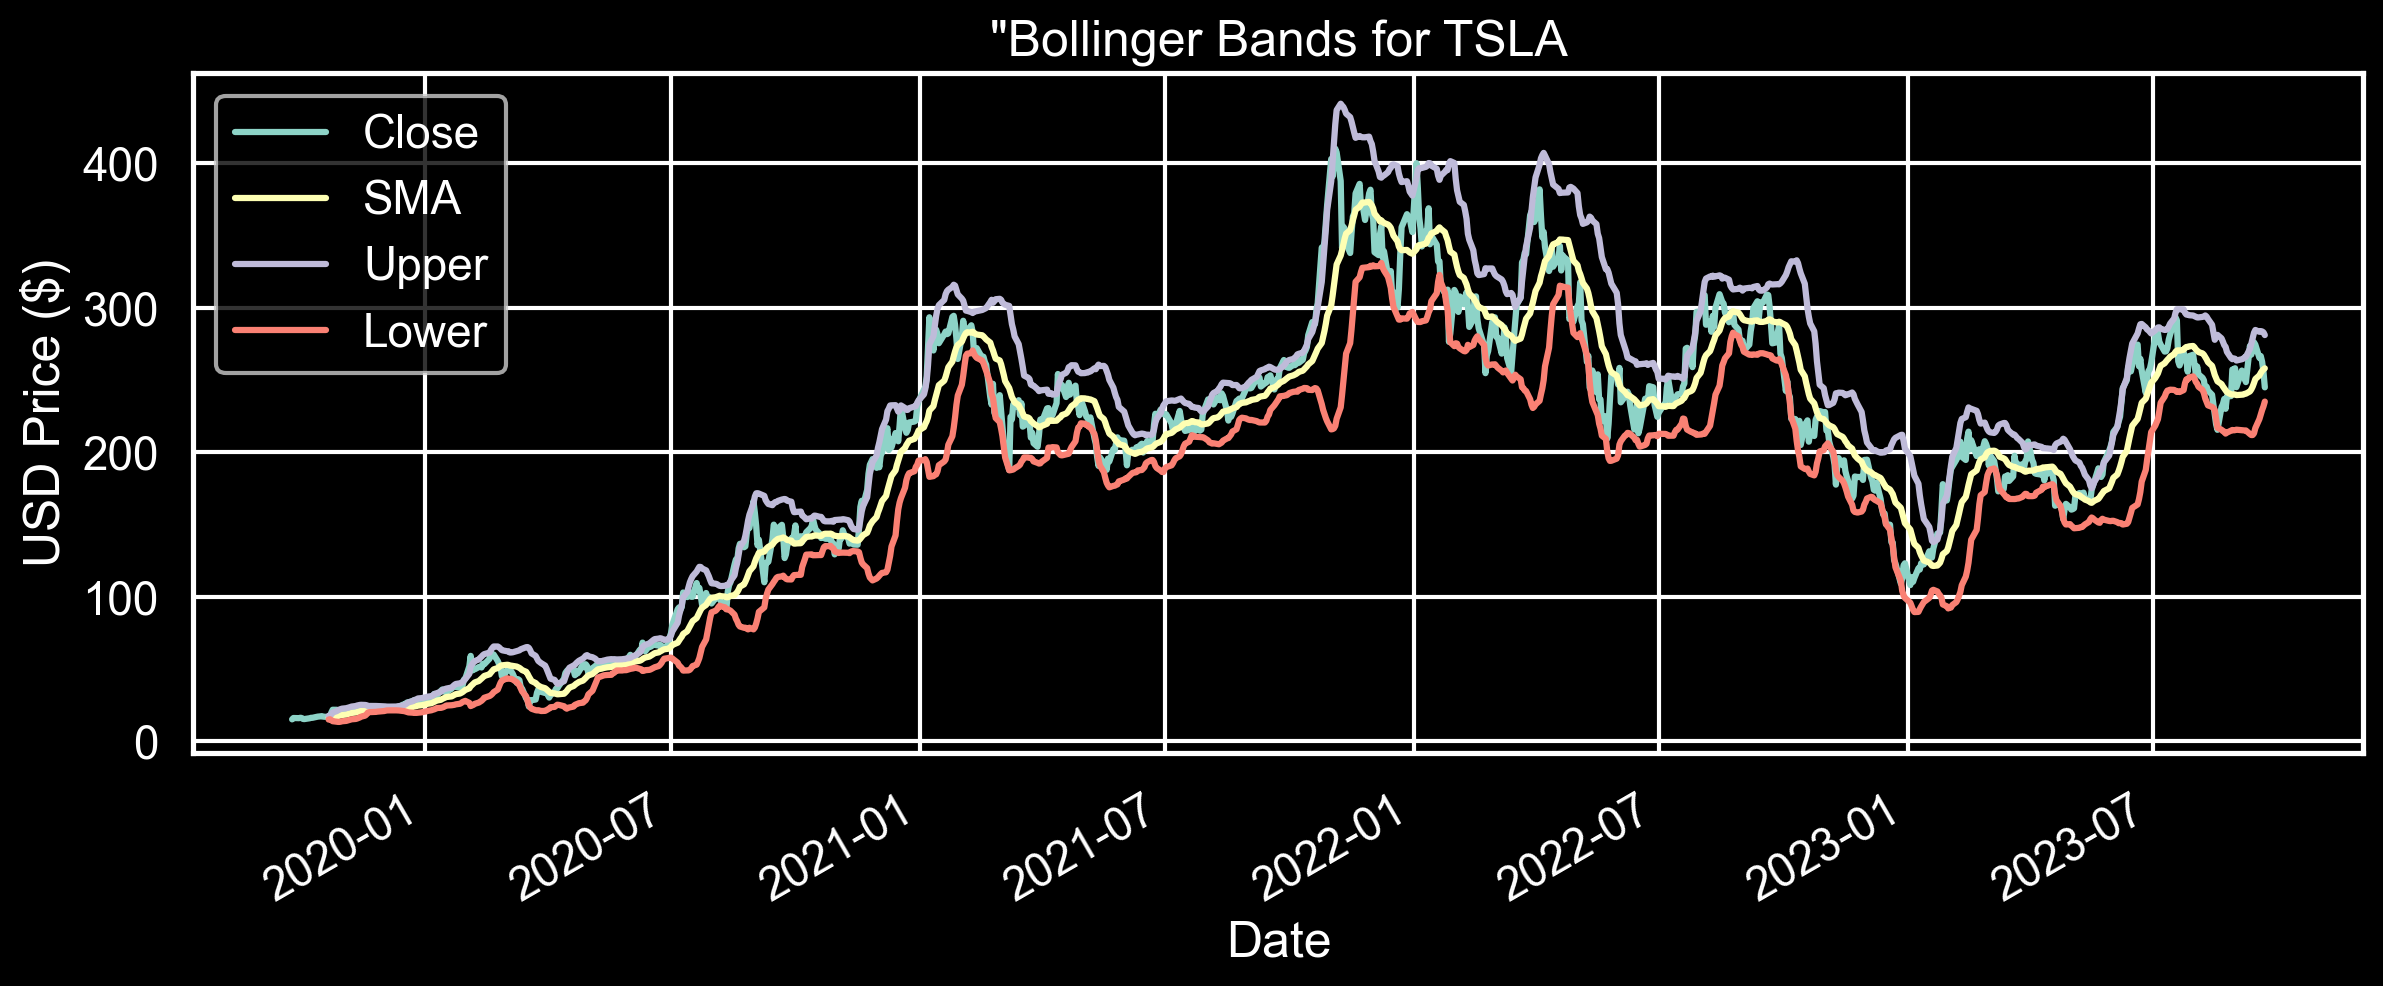

In [16]:
df_tsla[columns_list].plot(figsize=(14, 5))
plt.title('"Bollinger Bands for TSLA')
plt.ylabel('USD Price ($)')
plt.show()

In [17]:
#We plot the data again using interactive iplot

df_tsla[columns_list].iplot()

In [18]:
#we create a new dataframe

new_df_tsla= df_tsla[period-1:]
new_df_tsla

Open        High         Low       Close     Volume  \
Date                                                                    
2019-10-22   16.954666   17.222000   16.723333   17.038668   69012000   
2019-10-23   16.966667   17.076000   16.756666   16.978666   78916500   
2019-10-24   19.891333   20.328667   19.280001   19.978666  445813500   
2019-10-25   19.848000   22.000000   19.740667   21.875334  450091500   
2019-10-28   21.836000   22.722668   21.506666   21.847334  283054500   
...                ...         ...         ...         ...        ...   
2023-09-18  271.160004  271.440002  263.760010  265.279999  101543300   
2023-09-19  264.350006  267.850006  261.200012  266.500000  103704000   
2023-09-20  267.040009  273.929993  262.459991  262.589996  122514600   
2023-09-21  257.850006  260.859985  254.210007  255.699997  119531000   
2023-09-22  257.399994  257.790009  244.479996  244.880005  127024300   

                   SMA        STD       Upper       Lower  
Date                                                       
2019-10-22   16.413567   0.653708   17.720984   15.106150  
2019-10-23   16.500167   0.603806   17.707779   15.292555  
2019-10-24   16.690567   0.978543   18.647653   14.733480  
2019-10-25   16.977233   1.506665   19.990563   13.963904  
2019-10-28   17.266700   1.840020   20.946740   13.586660  
...                ...        ...         ...         ...  
2023-09-18  253.120998  15.088786  283.298571  222.943426  
2023-09-19  254.881998  14.447189  283.776376  225.987621  
2023-09-20  256.351998  13.594419  283.540837  229.163159  
2023-09-21  257.293998  12.802336  282.898670  231.689326  
2023-09-22  258.035999  11.503802  281.043602  235.028395  

[987 rows x 9 columns]

In [19]:
#We create a function to get the buy ans sell signals

def get_signal(data):
    
    buy_signal=[]
    sell_signal=[]
    
    for i in range(len(data['Close'])):
        if data['Close'][i] > data['Upper'][i]: 
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['Close'][i] < data['Lower'][i]: 
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return(buy_signal, sell_signal)

In [20]:
new_df_tsla['Buy']=get_signal(new_df_tsla)[0]
new_df_tsla['Sell']=get_signal(new_df_tsla)[1]

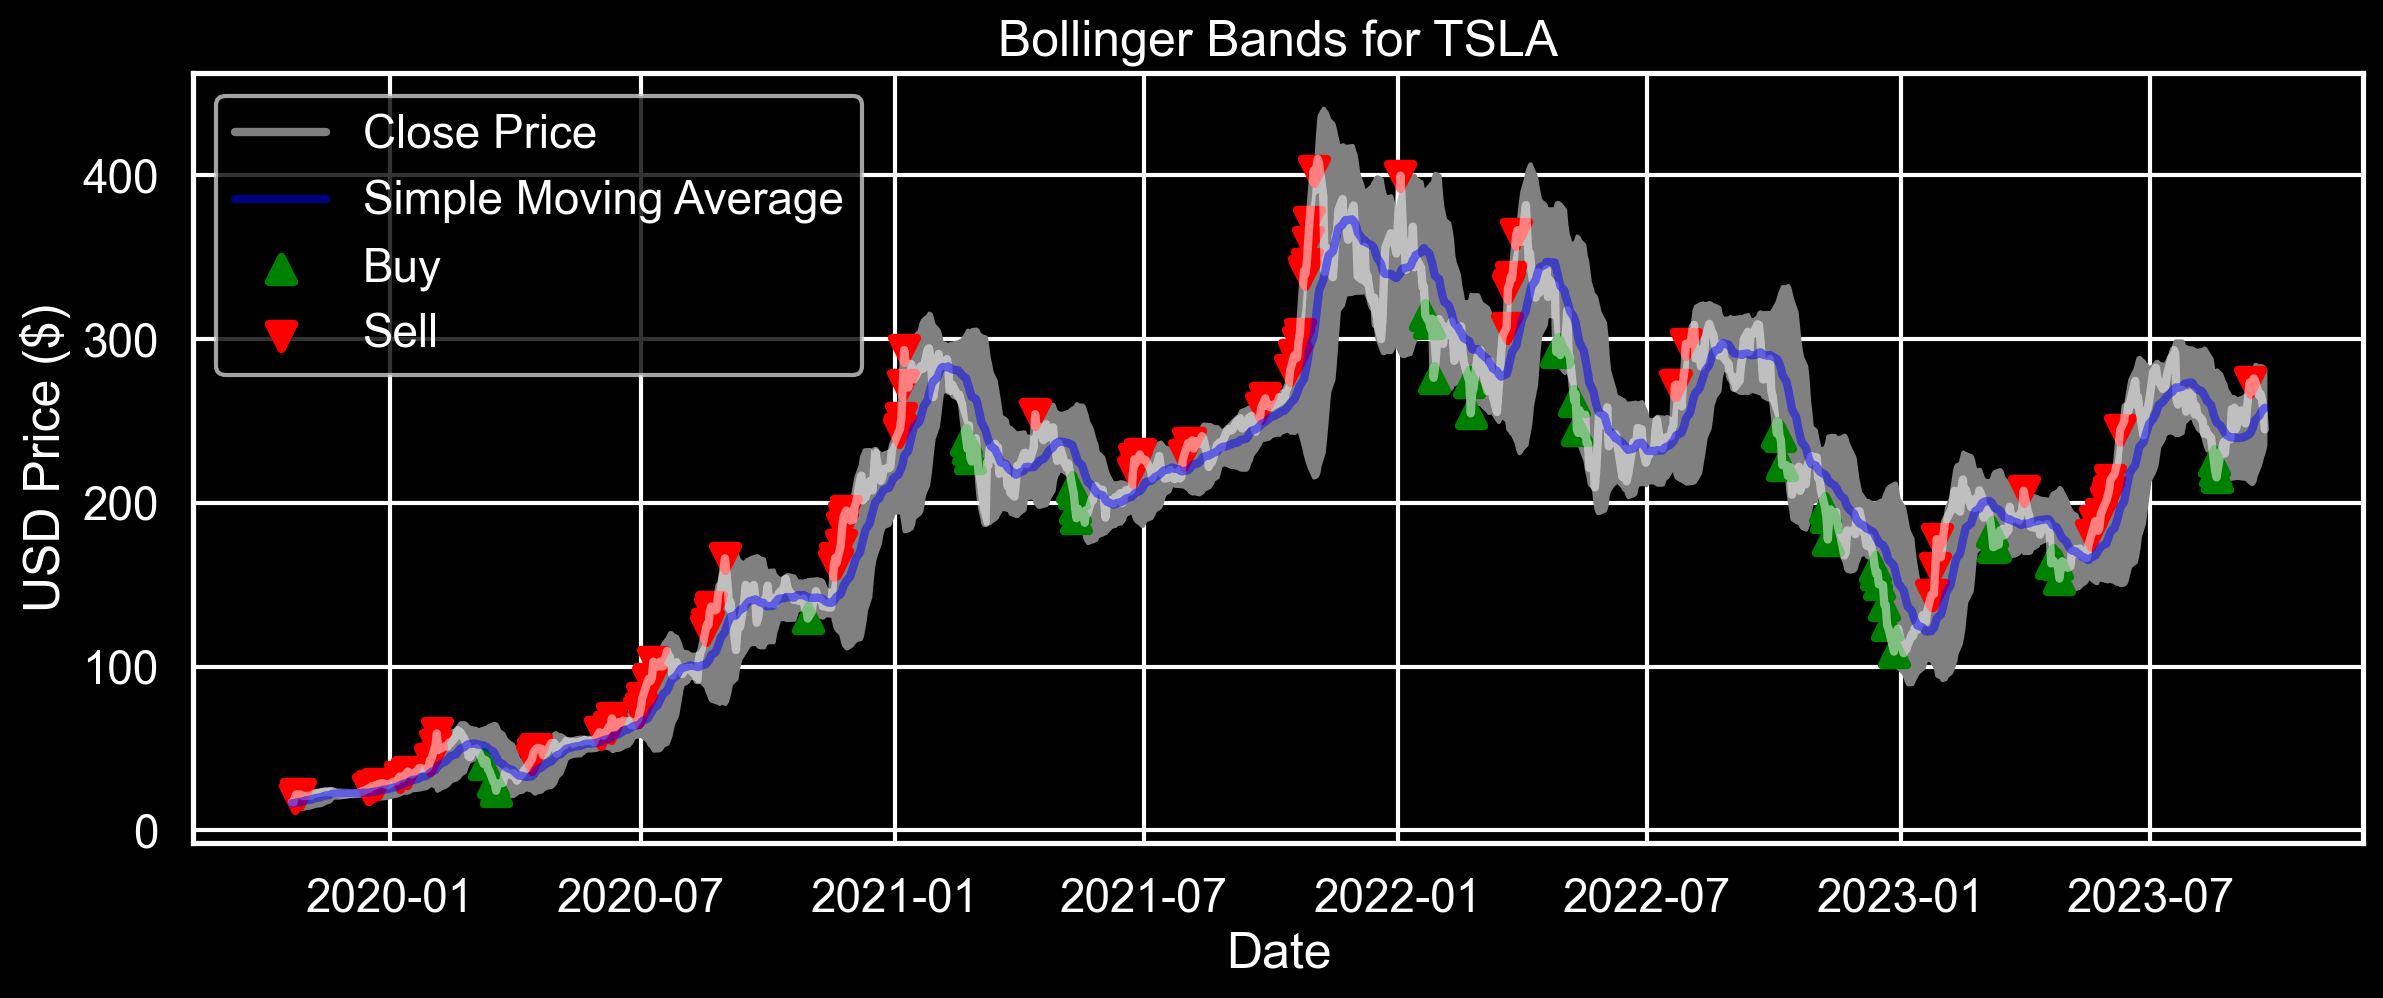

In [21]:
#Plot all of the data

fig=plt.figure(figsize=(14,5))
ax=fig.add_subplot(1,1,1)
x_axis=new_df_tsla.index
ax.fill_between(x_axis, new_df_tsla['Upper'], new_df_tsla['Lower'], color='gray')
ax.plot(x_axis, new_df_tsla['Close'], color='white', lw=3, label='Close Price', alpha=0.5)
ax.plot(x_axis, new_df_tsla['SMA'], color='blue', lw=3, label='Simple Moving Average', alpha=0.5)
ax.scatter(x_axis, new_df_tsla['Buy'], color='green', lw=3, label='Buy', marker='^', alpha=1)
ax.scatter(x_axis, new_df_tsla['Sell'], color='red', lw=3, label='Sell', marker='v', alpha=1)
ax.set_title('Bollinger Bands for TSLA')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
ax.legend()
plt.show()